In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../../..")
from utils import utils, postprocessing_utils as post

In [2]:
def prepare_table(task, short_model_name, metric):
    params = {
        "results_dir": "../../../results/",
        "experiment": "acl-pretrain",
        "short_model_name": short_model_name,
        "task": task,
        "metric": metric
    }

    M = post.Metrics(**params)
    df = M.transfer_loss()
    df["Transfer-Loss"] *= 100
    df_same = df[df["Train-Group"] == df["Test-Group"]]
    df_others = df[df["Train-Group"] != df["Test-Group"]]
    df_same.loc[:, "Test-Group"] = "Intra-Group"
    df_others["Test-Group"] = "Inter-Group"
    final = pd.concat([df_same, df_others], ignore_index=True)
    return final

# PoS

In [3]:
task = "pos"
metric = "Accuracy"

### mBERT

In [4]:
short_model_name = "mbert"
final = prepare_table(task, short_model_name, metric)
G1 = final.loc[final["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G2 = final.loc[final["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

e:\anaconda\envs\tfm_ccil\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
e:\anaconda\envs\tfm_ccil\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [5]:
stats.levene(G1, G2)

LeveneResult(statistic=1.2294829340780318, pvalue=0.2687020084933453)

In [6]:
print("Intra:", stats.normaltest(G1))
print("Inter:", stats.normaltest(G2))

Intra: NormaltestResult(statistic=3.825723215479368, pvalue=0.147657244337418)
Inter: NormaltestResult(statistic=0.6295183537351223, pvalue=0.729964645475814)


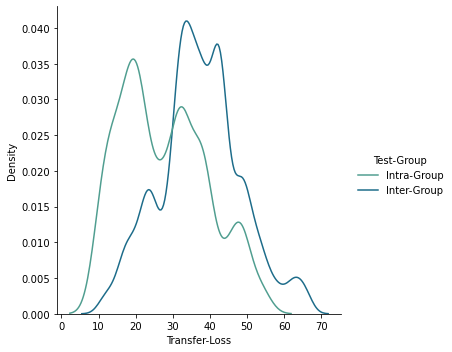

In [7]:
sns.displot(x="Transfer-Loss", data=final, kind="kde", hue="Test-Group", bw_adjust=0.5, palette="crest", common_norm=False)

In [8]:
stats.kruskal(G1, G2)

KruskalResult(statistic=24.029725897072353, pvalue=9.48598308834187e-07)

### XLM

In [9]:
short_model_name = "xlm-roberta"
final = prepare_table(task, short_model_name, metric)
G1 = final.loc[final["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G2 = final.loc[final["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

e:\anaconda\envs\tfm_ccil\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
e:\anaconda\envs\tfm_ccil\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [10]:
stats.levene(G1, G2)

LeveneResult(statistic=0.0030336153859584123, pvalue=0.9561254246888162)

In [11]:
print("Intra:", stats.normaltest(G1))
print("Inter:", stats.normaltest(G2))

Intra: NormaltestResult(statistic=3.2369934118133705, pvalue=0.19819642275607222)
Inter: NormaltestResult(statistic=4.492530524155647, pvalue=0.1057935990270356)


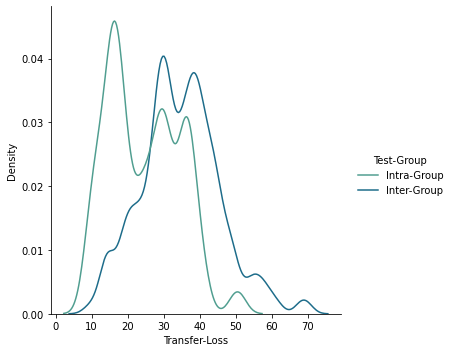

In [12]:
sns.displot(x="Transfer-Loss", data=final, kind="kde", hue="Test-Group", bw_adjust=0.5, palette="crest", common_norm=False)

In [13]:
stats.kruskal(G1, G2)

KruskalResult(statistic=29.542108695782417, pvalue=5.471496669735815e-08)

# Sentiment

In [14]:
task = "sentiment"
metric = "Macro_F1"

### mBERT

In [15]:
short_model_name = "mbert"
final = prepare_table(task, short_model_name, metric)
G1 = final.loc[final["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G2 = final.loc[final["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

e:\anaconda\envs\tfm_ccil\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
e:\anaconda\envs\tfm_ccil\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [16]:
stats.levene(G1, G2)

LeveneResult(statistic=0.012359606393021784, pvalue=0.9115722507053229)

In [17]:
print("Intra:", stats.normaltest(G1))
print("Inter:", stats.normaltest(G2))

Intra: NormaltestResult(statistic=1.0224617979913986, pvalue=0.5997568841299226)
Inter: NormaltestResult(statistic=4.632495676095457, pvalue=0.09864301666233306)


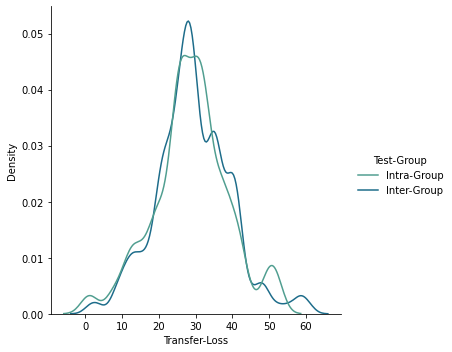

In [18]:
sns.displot(x="Transfer-Loss", data=final, kind="kde", hue="Test-Group", bw_adjust=0.5, palette="crest", common_norm=False)

In [19]:
stats.kruskal(G1, G2)

KruskalResult(statistic=0.053619675089294105, pvalue=0.8168803797861172)

### XLM

In [20]:
short_model_name = "xlm-roberta"
final = prepare_table(task, short_model_name, metric)
G1 = final.loc[final["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G2 = final.loc[final["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

e:\anaconda\envs\tfm_ccil\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
e:\anaconda\envs\tfm_ccil\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [21]:
stats.levene(G1, G2)

LeveneResult(statistic=0.3829392729602202, pvalue=0.5366262021802068)

In [22]:
print("Intra:", stats.normaltest(G1))
print("Inter:", stats.normaltest(G2))

Intra: NormaltestResult(statistic=3.724316428041407, pvalue=0.1553370178066355)
Inter: NormaltestResult(statistic=2.901060804715218, pvalue=0.23444590444957275)


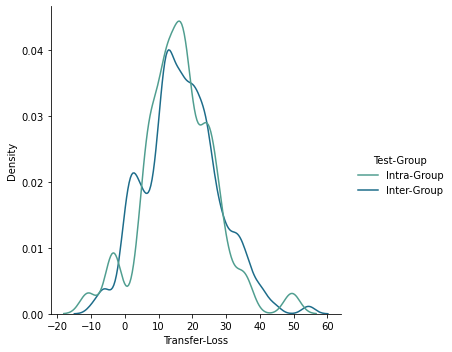

In [23]:
sns.displot(x="Transfer-Loss", data=final, kind="kde", hue="Test-Group", bw_adjust=0.5, palette="crest", common_norm=False)

In [24]:
stats.kruskal(G1, G2)

KruskalResult(statistic=0.1237575415060519, pvalue=0.7249943329860666)

# Model comparison

### PoS

In [25]:
final1 = prepare_table("pos", "mbert", "Accuracy")
final1["Model"] = "mBERT"
final2 = prepare_table("pos", "xlm-roberta", "Accuracy")
final2["Model"] = "XLM"
final = pd.concat([final1, final2])
G1 = final.loc[final["Model"] == "mBERT", "Transfer-Loss"].values
G2 = final.loc[final["Model"] == "XLM", "Transfer-Loss"].values

e:\anaconda\envs\tfm_ccil\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
e:\anaconda\envs\tfm_ccil\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [26]:
stats.levene(G1, G2)

LeveneResult(statistic=0.13304151288895255, pvalue=0.7154712198412028)

In [27]:
print("mBERT:", stats.normaltest(G1))
print("XLM:", stats.normaltest(G2))

mBERT: NormaltestResult(statistic=0.937487988821016, pvalue=0.6257877678177486)
XLM: NormaltestResult(statistic=3.325609357324127, pvalue=0.18960644850029698)


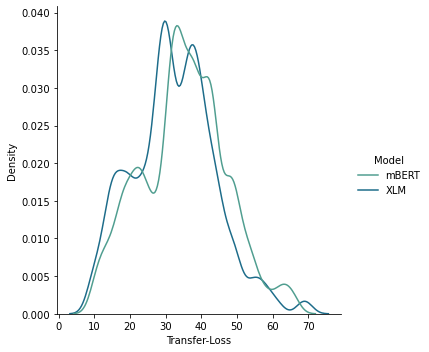

In [28]:
sns.displot(x="Transfer-Loss", data=final, kind="kde", hue="Model", bw_adjust=0.5, palette="crest", common_norm=False)

In [29]:
stats.kruskal(G1, G2)

KruskalResult(statistic=6.965651441241562, pvalue=0.008308917668726228)

### Sentiment

In [30]:
final1 = prepare_table("sentiment", "mbert", "Macro_F1")
final1["Model"] = "mBERT"
final2 = prepare_table("sentiment", "xlm-roberta", "Macro_F1")
final2["Model"] = "XLM"
final = pd.concat([final1, final2])
G1 = final.loc[final["Model"] == "mBERT", "Transfer-Loss"].values
G2 = final.loc[final["Model"] == "XLM", "Transfer-Loss"].values

e:\anaconda\envs\tfm_ccil\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
e:\anaconda\envs\tfm_ccil\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [31]:
stats.levene(G1, G2)

LeveneResult(statistic=1.434313469038493, pvalue=0.2316553045732621)

In [32]:
print("mBERT:", stats.normaltest(G1))
print("XLM:", stats.normaltest(G2))

mBERT: NormaltestResult(statistic=3.9863963337485315, pvalue=0.136258948998291)
XLM: NormaltestResult(statistic=4.461160078232324, pvalue=0.10746607752544138)


In [33]:
stats.kruskal(G1, G2)

KruskalResult(statistic=137.77166709979224, pvalue=8.175713950905773e-32)

# Two-way ANOVA

### PoS

In [52]:
final1 = prepare_table("pos", "mbert", "Accuracy")
final1["Model"] = "mBERT"
G1 = final1.loc[final1["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G2 = final1.loc[final1["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

final2 = prepare_table("pos", "xlm-roberta", "Accuracy")
final2["Model"] = "XLM"
G3 = final2.loc[final2["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G4 = final2.loc[final2["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

final = pd.concat([final1, final2])
final = final.rename(columns={"Transfer-Loss": "TL", "Test-Group": "Type"})

e:\anaconda\envs\tfm_ccil\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [53]:
stats.levene(G1, G2, G3, G4)

LeveneResult(statistic=0.07676361824561674, pvalue=0.9725323972860205)

In [54]:
print("Intra mBERT:", stats.normaltest(G1))
print("Inter mBERT:", stats.normaltest(G2))
print("Intra XLM:", stats.normaltest(G3))
print("Inter XLM:", stats.normaltest(G4))

Intra mBERT: NormaltestResult(statistic=7.982537208638812, pvalue=0.018476260182607576)
Inter mBERT: NormaltestResult(statistic=8.090359436178705, pvalue=0.01750655812788086)
Intra XLM: NormaltestResult(statistic=18.894171679525755, pvalue=7.891921372766459e-05)
Inter XLM: NormaltestResult(statistic=20.494827007343453, pvalue=3.5449071268761684e-05)


In [ ]:
formula = "TL ~ C(Type) + C(Model) + C(Type):C(Model)"
model = ols(formula, final).fit()
aov_table = anova_lm(model, typ=2)

In [46]:
print(aov_table)

                         sum_sq     df           F        PR(>F)
C(Type)              978.158876    1.0    5.519445  1.909136e-02
C(Model)           21174.422285    1.0  119.480657  9.841311e-26
C(Type):C(Model)       2.939217    1.0    0.016585  8.975674e-01
Residual          120509.942495  680.0         NaN           NaN


### Sentiment

In [57]:
final1 = prepare_table("sentiment", "mbert", "Macro_F1")
final1["Model"] = "mBERT"
G1 = final1.loc[final1["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G2 = final1.loc[final1["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

final2 = prepare_table("sentiment", "xlm-roberta", "Macro_F1")
final2["Model"] = "XLM"
G3 = final2.loc[final2["Test-Group"] == "Intra-Group", "Transfer-Loss"].values
G4 = final2.loc[final2["Test-Group"] == "Inter-Group", "Transfer-Loss"].values

final = pd.concat([final1, final2])
final = final.rename(columns={"Transfer-Loss": "TL", "Test-Group": "Type"})

e:\anaconda\envs\tfm_ccil\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
e:\anaconda\envs\tfm_ccil\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [58]:
stats.levene(G1, G2, G3, G4)

LeveneResult(statistic=3.962571985845256, pvalue=0.00812451997805647)